### 🧮 Normalization Techniques

| Normalization Technique | Formula                                                                                   | When to Use                                                                                      |
|-------------------------|-------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------|
| **Linear Scaling**      | x' = (x - min(x)) / (max(x) - min(x))                                                     | When the feature is mostly uniformly distributed across the range (Flat-shaped).                |
| **Z-score Scaling**     | x' = (x - μ) / σ                                                                          | When the feature is normally distributed (peak close to mean) (Bell-shaped).                    |
| **Log Scaling**         | x' = log(x + 1) (or log(x) if x > 0)                                                      | When the feature distribution is heavily skewed on at least one side of the tail (Heavy-tailed).|
| **Clipping**            | If x > max_val, set x = max_val<br>If x < min_val, set x = min_val                        | When the feature contains extreme outliers.                                                     |


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../data/FuelConsumptionCo2.csv')
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [ ]:
df = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS', ]]

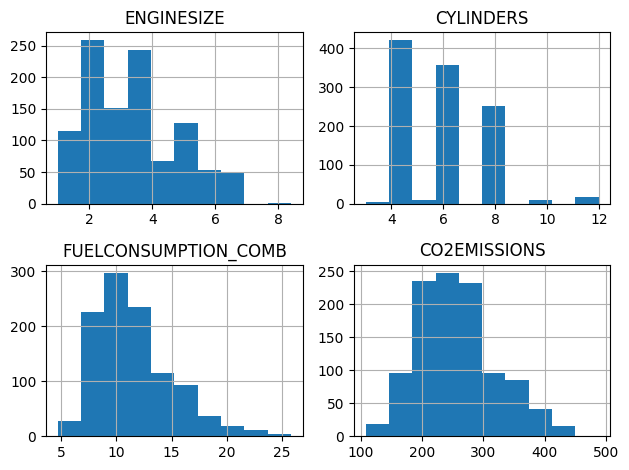

In [8]:
df.hist()
plt.tight_layout()

As you can see:
- `CO2EMISSION` looks like Normally distributed -> Z-score normalization is applicable
- `FUELCONSUMPTION_COMB` looks like a right skewed graph -> log scalling is applicable

For CO2EMISSION

In [ ]:
df['CO2EMISSIONS'] = (df['CO2EMISSIONS'] - np.mean(df['CO2EMISSIONS']) )/ np.std(df['CO2EMISSIONS'])

# df['CO2EMISSIONS'] = (df['CO2EMISSIONS'] - df['CO2EMISSIONS'].mean()) / df['CO2EMISSIONS'].std()
# also correct

C:\Users\HP\AppData\Local\Temp\ipykernel_20680\1185833917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CO2EMISSIONS'] = (df['CO2EMISSIONS'] - np.mean(df['CO2EMISSIONS']) )/ np.std(df['CO2EMISSIONS'])


In [11]:
df['CO2EMISSIONS'].sample(10)

363    -0.335141
582    -0.635097
128    -0.414076
246     1.148853
358    -0.635097
1000    0.233197
177     1.985572
500     0.312133
879    -0.161482
944    -0.603522
Name: CO2EMISSIONS, dtype: float64

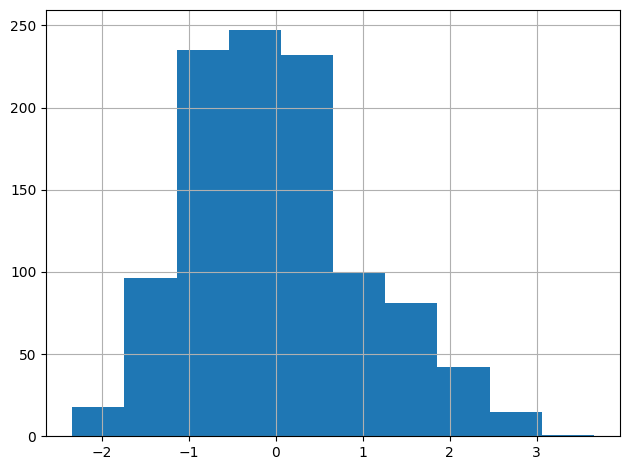

In [12]:
df['CO2EMISSIONS'].hist()
plt.tight_layout()

For FUELCONSUMPTION_COMB

In [13]:
df['FUELCONSUMPTION_COMB'] = np.log(df['FUELCONSUMPTION_COMB'])

C:\Users\HP\AppData\Local\Temp\ipykernel_20680\1210758440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FUELCONSUMPTION_COMB'] = np.log(df['FUELCONSUMPTION_COMB'])


In [15]:
df['FUELCONSUMPTION_COMB'].sample(10)

321    1.987874
939    1.856298
59     2.451005
738    2.572612
951    2.054124
719    2.261763
915    2.879198
642    3.063391
709    1.974081
666    2.397895
Name: FUELCONSUMPTION_COMB, dtype: float64

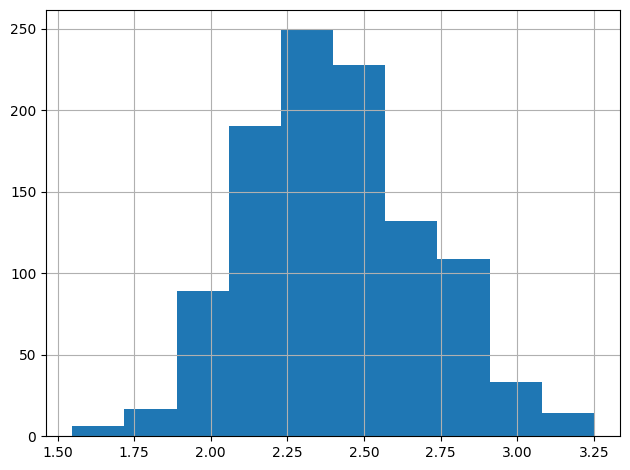

In [14]:
df['FUELCONSUMPTION_COMB'].hist()
plt.tight_layout()

Now more normalized